# Brain Stroke Diagnosos Prediction

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
)

In [110]:
# importing the data
data = pd.read_csv("../datasets/train.csv")
test_data = pd.read_csv("../datasets/test.csv")

In [111]:
print(data.shape, test_data.shape)

(15304, 12) (10204, 11)


In [112]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [113]:
data["stroke"].value_counts()

stroke
0    14672
1      632
Name: count, dtype: int64

In [114]:
# missing values
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [116]:
data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9446,9446,Male,72.0,0,1,Yes,Self-employed,Rural,59.61,34.7,smokes,1
6121,6121,Male,27.0,0,0,No,Private,Rural,116.66,30.9,formerly smoked,0
6479,6479,Female,44.0,0,0,Yes,Private,Rural,72.03,23.1,never smoked,0
2146,2146,Female,20.0,0,0,No,Self-employed,Rural,85.84,23.8,never smoked,0
12427,12427,Male,58.0,0,0,Yes,Private,Rural,81.54,25.7,smokes,0
8509,8509,Female,1.8,0,0,No,children,Rural,82.48,19.1,Unknown,0
11544,11544,Female,53.0,0,0,Yes,Govt_job,Rural,83.84,32.1,Unknown,0
1165,1165,Male,71.0,1,1,Yes,Private,Rural,197.09,28.3,formerly smoked,0
2676,2676,Female,64.0,0,0,Yes,Govt_job,Rural,84.21,39.2,smokes,0
10372,10372,Female,53.0,0,0,Yes,Self-employed,Urban,113.41,32.4,Unknown,0


In [117]:
data = data.drop("id", axis=1)
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
14559,Male,17.0,0,0,No,Private,Urban,98.56,23.6,Unknown,0
11347,Female,79.0,0,0,No,Self-employed,Urban,79.63,21.7,Unknown,1
3597,Male,42.0,0,0,Yes,Private,Rural,107.50,54.0,Unknown,0
4425,Female,36.0,0,0,No,Govt_job,Urban,67.02,25.5,smokes,0
11215,Female,37.0,0,0,Yes,Private,Rural,79.83,27.5,never smoked,0
8741,Female,65.0,0,0,Yes,Private,Urban,78.73,23.9,never smoked,0
11331,Female,26.0,0,0,Yes,Private,Rural,69.77,23.2,Unknown,0
14822,Male,47.0,0,0,Yes,Self-employed,Rural,70.71,25.4,never smoked,0
9176,Male,52.0,0,0,Yes,Govt_job,Urban,70.32,25.4,never smoked,0
10771,Female,40.0,0,0,No,Private,Rural,70.65,37.3,formerly smoked,0


In [118]:
data["work_type"].value_counts()

work_type
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: count, dtype: int64

In [119]:
data["smoking_status"].value_counts()

smoking_status
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: count, dtype: int64

In [120]:
data["Residence_type"].value_counts()

Residence_type
Rural    7664
Urban    7640
Name: count, dtype: int64

In [121]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
581,Male,63.0,0,0,Yes,Private,Rural,75.52,31.2,formerly smoked,0
9312,Female,34.0,0,0,No,Govt_job,Rural,74.01,20.0,never smoked,0
11799,Male,45.0,0,0,Yes,Private,Rural,104.55,18.9,formerly smoked,0
1713,Female,65.0,0,0,Yes,Self-employed,Rural,82.84,33.0,never smoked,0
14959,Female,80.0,0,0,Yes,Self-employed,Rural,91.02,34.1,never smoked,1
1845,Male,45.0,0,0,No,Govt_job,Urban,70.23,23.3,never smoked,0
1397,Male,18.0,0,0,No,Private,Urban,79.89,23.6,Unknown,0
8541,Female,80.0,0,0,Yes,Private,Rural,80.96,22.0,never smoked,0
7461,Female,57.0,0,0,Yes,Self-employed,Urban,89.81,24.4,formerly smoked,0
12440,Female,31.0,0,0,Yes,Private,Urban,62.64,18.6,smokes,0


In [122]:
data["age"].unique

<bound method Series.unique of 0        28.0
1        33.0
2        42.0
3        56.0
4        24.0
         ... 
15299    22.0
15300    46.0
15301    75.0
15302    46.0
15303    14.0
Name: age, Length: 15304, dtype: float64>

In [123]:
data["gender"].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [124]:
data["avg_glucose_level"].unique

<bound method Series.unique of 0         79.53
1         78.44
2        103.00
3         64.87
4         73.36
          ...  
15299     72.63
15300    101.19
15301     87.69
15302    101.13
15303     85.12
Name: avg_glucose_level, Length: 15304, dtype: float64>

In [125]:
data["bmi"].unique

<bound method Series.unique of 0        31.1
1        23.9
2        40.3
3        28.8
4        28.8
         ... 
15299    19.5
15300    32.1
15301    26.2
15302    22.5
15303    24.7
Name: bmi, Length: 15304, dtype: float64>

In [126]:
data["smoking_status"].value_counts()

smoking_status
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: count, dtype: int64

In [127]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
14674,Female,26.0,0,0,Yes,Private,Rural,88.79,38.1,Unknown,0
1135,Female,56.0,0,0,Yes,Private,Rural,102.97,28.2,never smoked,0
12574,Female,26.0,0,0,No,Private,Rural,85.27,24.0,never smoked,0
911,Female,24.0,0,0,Yes,Private,Urban,60.55,23.3,never smoked,0
12894,Female,70.0,1,0,Yes,Private,Urban,71.63,27.8,never smoked,0
13044,Female,30.0,0,0,Yes,Private,Urban,115.23,28.2,never smoked,0
6172,Female,31.0,0,0,No,Private,Urban,131.43,45.0,smokes,0
11119,Male,37.0,0,0,Yes,Private,Urban,134.39,22.7,Unknown,0
6324,Male,50.0,0,0,Yes,Govt_job,Rural,99.96,40.2,never smoked,0
13967,Male,5.0,0,0,No,children,Rural,80.07,18.1,Unknown,0


In [128]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15304.0,41.417708,21.444673,0.08,26.0,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.0,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.0,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.5,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.0,0.00,0.00,1.0


In [129]:
data.nunique()

gender                  3
age                   106
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3740
bmi                   407
smoking_status          4
stroke                  2
dtype: int64

In [130]:
data.duplicated().sum()

np.int64(0)

In [131]:
data["age"] = np.ceil(data["age"])
test_data["age"] = np.ceil(data["age"])

In [132]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9842,Female,37.0,0,0,Yes,Private,Urban,82.41,23.2,never smoked,0
182,Male,14.0,0,0,No,Private,Rural,91.96,28.7,never smoked,0
5439,Female,81.0,0,0,Yes,Private,Rural,78.16,29.6,formerly smoked,1
571,Female,29.0,0,0,Yes,Private,Urban,87.86,28.4,never smoked,0
13207,Male,57.0,0,0,Yes,Private,Urban,98.44,25.8,never smoked,0
4037,Female,47.0,0,0,Yes,Private,Rural,142.02,22.7,Unknown,0
5156,Male,74.0,0,0,Yes,Self-employed,Urban,204.77,30.6,formerly smoked,0
8616,Female,66.0,0,0,Yes,Self-employed,Urban,80.42,33.8,formerly smoked,0
10026,Female,49.0,0,0,Yes,Private,Rural,69.11,32.2,formerly smoked,0
7840,Male,49.0,0,0,Yes,Private,Rural,56.13,29.0,smokes,0


In [133]:
test_data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5341,20645,Female,33.0,0,0,Yes,Private,Rural,91.44,29.7,never smoked
9864,25168,Female,38.0,0,0,Yes,Private,Rural,68.66,23.5,never smoked
9475,24779,Female,60.0,0,0,No,children,Rural,90.52,22.6,Unknown
4795,20099,Male,48.0,0,0,No,Private,Rural,75.35,40.1,formerly smoked
5794,21098,Female,38.0,0,0,Yes,Private,Urban,63.46,39.7,never smoked
6675,21979,Male,47.0,0,0,No,Private,Rural,62.69,31.6,Unknown
3296,18600,Female,40.0,0,0,Yes,Private,Urban,89.03,37.3,never smoked
6302,21606,Female,58.0,0,0,Yes,Govt_job,Rural,60.74,27.7,never smoked
4406,19710,Female,23.0,1,0,Yes,Private,Urban,95.44,24.1,formerly smoked
5233,20537,Female,44.0,0,0,No,Private,Rural,103.92,18.5,Unknown


In [134]:
test_data = test_data.drop("id", axis=1)
test_data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3955,Male,59.0,0,0,Yes,Private,Rural,85.83,28.7,formerly smoked
9987,Female,60.0,0,0,Yes,Private,Rural,90.31,22.2,never smoked
3774,Female,40.0,0,0,No,children,Urban,99.44,17.3,Unknown
2942,Male,58.0,0,0,No,Private,Urban,91.02,22.8,never smoked
10084,Female,62.0,0,0,Yes,Self-employed,Urban,61.89,20.1,smokes
8460,Female,65.0,0,0,Yes,Private,Urban,84.48,35.7,Unknown
7254,Male,37.0,0,0,Yes,Private,Urban,65.25,27.4,never smoked
3304,Female,58.0,0,0,No,Self-employed,Urban,105.90,28.5,formerly smoked
3302,Female,1.0,0,1,No,Private,Rural,91.23,16.8,never smoked
8049,Female,49.0,0,0,Yes,Private,Rural,68.70,27.3,never smoked


In [135]:
# removing the other gender from training
data.drop(data[data.gender == "Other"].index, inplace=True)
data["gender"].value_counts()

gender
Female    9446
Male      5857
Name: count, dtype: int64

In [136]:
test_data["gender"].value_counts()

gender
Female    6338
Male      3865
Other        1
Name: count, dtype: int64

In [137]:
# removing the other gender from test_data
test_data.drop(test_data[test_data.gender == "Other"].index, inplace=True)
test_data["gender"].value_counts()

gender
Female    6338
Male      3865
Name: count, dtype: int64

## Exploratory Data Analysis

In [138]:
# seaborn and plot default styles
sns.set_style("darkgrid")
plot_color = ["#B7410E", "#008080"]
sns.set_palette(["#B7410E", "black"])

In [139]:
# filtering data for stroke and non stroke
stroke_data = data[data["stroke"] == 1]
non_stroke_data = data[data["stroke"] == 0]

In [140]:
stroke_data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6008,Male,67.0,0,0,Yes,Private,Urban,97.76,26.9,Unknown,1
3922,Male,71.0,0,0,Yes,Govt_job,Urban,100.98,27.0,never smoked,1
1604,Female,82.0,0,0,Yes,Private,Urban,93.02,40.5,never smoked,1
11635,Male,68.0,0,0,Yes,Private,Urban,74.63,28.7,never smoked,1
10219,Female,53.0,0,0,Yes,Private,Rural,84.88,34.7,Unknown,1
11200,Male,79.0,1,0,Yes,Private,Rural,218.46,26.6,smokes,1
9256,Female,64.0,0,0,Yes,Private,Rural,89.54,27.2,never smoked,1
15071,Female,62.0,1,0,Yes,Private,Urban,124.37,28.3,never smoked,1
1912,Female,78.0,0,0,Yes,Private,Rural,208.30,26.9,Unknown,1
5260,Female,80.0,0,0,Yes,Private,Rural,211.03,31.0,formerly smoked,1


In [141]:
non_stroke_data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8358,Male,32.0,0,0,Yes,Private,Urban,57.46,43.4,smokes,0
3674,Male,17.0,0,0,No,Private,Urban,123.41,30.2,Unknown,0
3513,Male,30.0,0,0,No,Self-employed,Rural,62.99,31.8,never smoked,0
2978,Male,37.0,0,0,No,Private,Urban,78.32,29.1,Unknown,0
14547,Male,2.0,0,0,No,children,Urban,57.83,18.7,Unknown,0
3825,Male,25.0,0,0,No,Private,Urban,92.34,26.1,smokes,0
7674,Male,58.0,0,0,Yes,Self-employed,Urban,65.78,26.7,never smoked,0
9955,Female,63.0,0,0,Yes,Self-employed,Rural,69.45,30.3,never smoked,0
10490,Female,25.0,0,0,Yes,Private,Rural,55.34,27.1,never smoked,0
13576,Male,7.0,0,0,No,children,Rural,77.12,18.6,Unknown,0


In [142]:
stroke_count = data["stroke"].value_counts()
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [143]:
# plot for stroke and non stroke: pie chart: univariate analysis
fig = px.pie(
    stroke_count,
    values = stroke_count.values,
    names = stroke_count.index,
    title = "Proportion of Stroke Cases",
    color_discrete_sequence = plot_color
)
fig.update_layout(
    legend_title_text = "Stroke Status",
    title_x = 0.3,
    title_y = 0.95,
    paper_bgcolor="lightgray",
    plot_bgcolor="black",
    width=1000,
    height=600
)
fig.show()

In [144]:
# bivariate analysis
def custom_hist(column:str, titles:list)->go.Figure:
    fig = sp.make_subplots(
        rows=1,
        cols=2,
        subplot_titles = ['Stroke', 'No Stroke']
    )
    stroke_hist = px.histogram(
        stroke_data,
        x = column,
        color_discrete_sequence = ["#B7410E"]
    )
    non_stroke_hist = px.histogram(
        non_stroke_data,
        x = column,
        color_discrete_sequence = ["#008080"]
    )
    fig.add_trace(stroke_hist.data[0], row=1, col=1)
    fig.add_trace(non_stroke_hist.data[0], row=1, col=2)
    fig.update_layout(title = titles[0], title_x = 0.5)
    fig.update_xaxes(title_text = titles[1], row=1, col=1)
    fig.update_xaxes(title_text = titles[1], row=1, col=2)
    fig.update_yaxes(title_text = "Count")

    return fig

In [145]:
# glucose levels distribution by stroke
column = "avg_glucose_level"
glucose_titles = [
    "Average Glucose Level Distribution by Stroke",
    "Average Glucose Level"
]
glu_fig = custom_hist(column, glucose_titles)
glu_fig.show()

In [146]:
# age distribution by stroke
age_column = "age"
age_titles = [
    "Age Distribution by Stroke",
    "Age"
]
age_fig = custom_hist(age_column, age_titles)
age_fig.show()

In [147]:
stroke_data["bmi"].mean()

np.float64(30.230696202531643)

In [148]:
non_stroke_data["bmi"].mean()

np.float64(28.02217163110899)

In [149]:
fig = px.violin(
    data,
    y = "bmi",
    x = "stroke",
    box = True,
    width = 700,
    height = 500,
    color_discrete_sequence = plot_color,
    title = "BMI and Stroke Status",
    labels = {
        "stroke": "Stroke Status",
        "bmi": "BMI"
    }
)
fig.update_layout(
    title_x = 0.3,
    title_y = 0.9
)
fig.show()

In [150]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

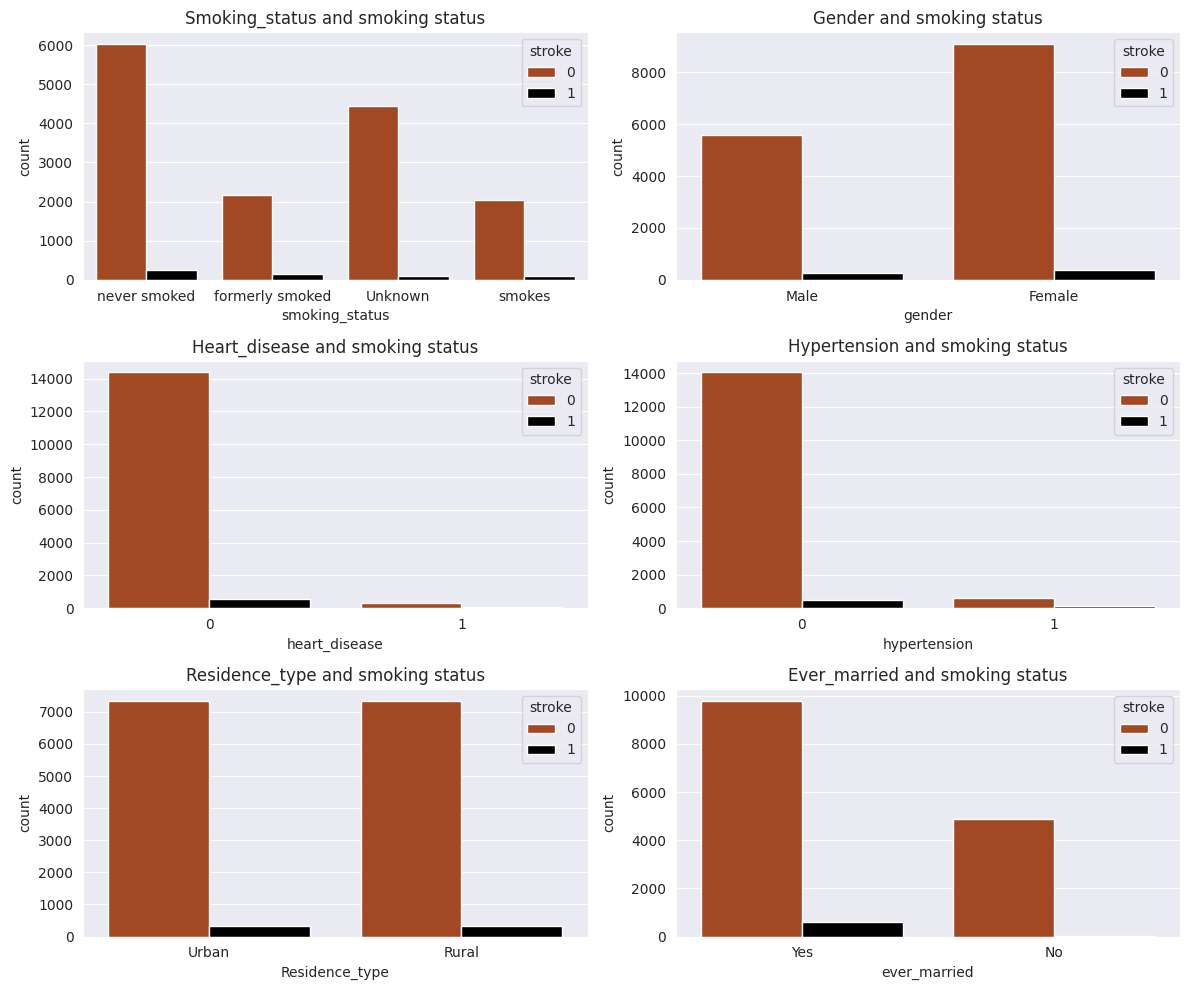

In [151]:
x_values = ["smoking_status", "gender", "heart_disease", "hypertension", "Residence_type", "ever_married"]
fig, axis = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(12, 10)
)

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(
        data = data,
        x = x_value,
        hue = "stroke",
        ax = ax
    )
    ax.set_title(f"{x_value.capitalize()} and smoking status")

plt.tight_layout()
plt.show()

## Data Preprocessing

In [152]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
12776,Female,57.0,0,0,Yes,Private,Rural,99.83,26.2,formerly smoked,0
13180,Male,59.0,0,0,Yes,Govt_job,Rural,75.29,27.0,formerly smoked,1
11760,Male,5.0,0,0,No,children,Urban,101.58,25.3,Unknown,0
13646,Female,32.0,0,0,Yes,Private,Rural,73.62,34.4,never smoked,0
210,Female,52.0,0,0,Yes,Private,Urban,107.45,35.8,smokes,0
13394,Male,18.0,0,0,No,Private,Rural,67.07,29.0,never smoked,0
7330,Male,24.0,0,0,No,Private,Urban,123.89,25.1,smokes,0
3848,Female,53.0,0,0,Yes,Private,Urban,97.93,26.7,Unknown,0
5562,Female,55.0,0,0,Yes,Private,Rural,90.96,31.3,never smoked,0
14740,Female,40.0,0,0,Yes,Private,Rural,72.36,38.1,smokes,0


In [153]:
data["stroke"].value_counts()

stroke
0    14671
1      632
Name: count, dtype: int64

In [154]:
# encoding categorical features
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})
data['ever_married'] = data['ever_married'].replace({'No': 0, 'Yes': 1})

/tmp/ipykernel_14239/4202156296.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_14239/4202156296.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [155]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
6873,1,17.0,0,0,0,Private,Urban,88.51,24.9,Unknown,0
13433,1,42.0,0,0,0,Private,Rural,80.08,21.0,never smoked,0
4897,1,32.0,0,0,0,Private,Urban,101.31,23.5,never smoked,0
6668,1,27.0,0,0,0,Private,Urban,60.01,34.4,never smoked,0
6256,0,15.0,0,0,0,children,Urban,85.58,22.4,Unknown,0
13663,1,79.0,0,0,1,Self-employed,Urban,104.38,26.7,Unknown,0
5064,0,44.0,0,0,1,Private,Urban,96.29,24.3,smokes,0
10897,0,55.0,0,0,0,Govt_job,Rural,99.64,25.9,formerly smoked,0
3854,0,57.0,0,0,1,Self-employed,Urban,82.14,36.5,never smoked,0
3315,1,55.0,0,0,1,Private,Rural,68.38,26.4,never smoked,0


In [162]:
# nominal features
nominal_features = ["work_type", "Residence_type", "smoking_status"]

# building the One Hot Encoder
nominal_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

# preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ("nom", nominal_transformer, nominal_features)
    ],
    remainder = "passthrough"
)

In [157]:
# feature and label separation
X, y = data.drop("stroke", axis=1), data["stroke"]
X.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
8513,1,78.0,1,0,1,Self-employed,Rural,90.43,31.8,smokes
450,1,34.0,0,0,0,Private,Rural,90.18,25.0,Unknown
4642,1,28.0,0,0,0,Private,Rural,95.30,43.7,never smoked
1972,1,55.0,0,0,1,Self-employed,Rural,90.98,29.3,never smoked
3590,1,58.0,0,0,1,Private,Rural,131.41,28.4,never smoked
6106,0,12.0,0,0,0,children,Urban,92.97,21.4,Unknown
12295,1,55.0,0,0,1,Govt_job,Urban,113.65,24.8,never smoked
5510,1,29.0,0,0,0,Private,Urban,94.37,36.2,Unknown
1540,1,41.0,0,0,1,Private,Urban,75.25,37.7,formerly smoked
13868,1,26.0,0,0,0,Private,Urban,112.54,33.1,Unknown


In [158]:
y.sample(10)

10852    0
12726    0
2537     0
575      0
4522     0
7148     0
5074     0
6686     0
13785    0
4051     0
Name: stroke, dtype: int64

In [159]:
y.nunique()

2

In [160]:
# train tes splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 21,
    stratify = y
)
print(X.shape, X_train.shape, X_test.shape)

(15303, 10) (12242, 10) (3061, 10)


In [163]:
# applying the preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [165]:
X_train_processed

array([[ 0.  ,  1.  ,  0.  , ...,  0.  , 75.04, 30.3 ],
       [ 0.  ,  1.  ,  0.  , ...,  1.  , 96.77, 28.5 ],
       [ 0.  ,  1.  ,  0.  , ...,  0.  , 80.08, 30.3 ],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  1.  , 83.79, 30.9 ],
       [ 0.  ,  0.  ,  1.  , ...,  1.  , 89.45, 30.1 ],
       [ 0.  ,  1.  ,  0.  , ...,  1.  , 76.08, 41.5 ]], shape=(12242, 15))

In [167]:
# using smote for imbalanced dataset
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

In [168]:
print(X_train_resampled.shape, y_train_resampled.shape)

(23472, 15) (23472,)


In [170]:
# building the random forest and the xgboost
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)